<div style="background-color: #e6f7ff; padding: 20px; border-radius: 10px; box-shadow: 2px 2px 10px #b8daff;">
<h1 style="color: #31708f;">Telecom Plan Profitability Analysis</h1>

<h2 style="color: #31708f;">Introduction</h2>
<p>In the competitive telecom market, choosing the right strategies for customer acquisition and retention is key to    profitability. <strong>Megaline</strong>, a telecom operator, offers two prepaid plans: <strong>Surf</strong> and <strong>Ultimate</strong>. Understanding which of these plans is more lucrative is crucial for the company to allocate its advertising budget effectively. This project seeks to analyze the behavior of 500 Megaline clients over the course of 2018 to determine which plan yields higher revenue.</p>
    
<h2 style="color: #31708f;">Project Scope</h2>
<p>Our analysis will focus on a comprehensive dataset that records the clients' demographics, plan details, and their usage of telecom services including calls, text messages, and data. We aim to:</p>
<ul>
    <li>Process and clean the dataset, converting data to appropriate types and rectifying any errors.</li>
    <li>Analyze clients' usage patterns and calculate the monthly revenue from each user, taking into account plan limits and overage charges.</li>
    <li>Perform a statistical analysis to compare the revenue generated from users of both plans and to investigate regional revenue disparities, particularly between the NY-NJ area and other regions.</li>
</ul>
    
<h2 style="color: #31708f;">Data Rounding Policy</h2>
<p>Megaline has a specific rounding policy where call durations are rounded up to the nearest minute, and data usage is rounded up to the nearest gigabyte. This policy will be a significant factor in our revenue calculations and analysis.</p>
    
<h2 style="color: #31708f;">Expected Outcomes</h2>
<p>By analyzing the data, we expect to reveal insights into customer usage patterns and preferences. These findings will be instrumental in deciding which plan is more profitable and how Megaline can adjust its marketing strategy to increase revenue.</p>
</div>



In [1]:
# Loading all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# Load the data files into different DataFrames
calls = pd.read_csv('/datasets/megaline_calls.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')
users = pd.read_csv('/datasets/megaline_users.csv')

In [6]:
# Print the general/summary information about the plans' DataFrame
plans.info(), plans.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


(None,
        messages_included  mb_per_month_included  minutes_included  \
 count           2.000000               2.000000          2.000000   
 mean          525.000000           23040.000000       1750.000000   
 std           671.751442           10861.160159       1767.766953   
 min            50.000000           15360.000000        500.000000   
 25%           287.500000           19200.000000       1125.000000   
 50%           525.000000           23040.000000       1750.000000   
 75%           762.500000           26880.000000       2375.000000   
 max          1000.000000           30720.000000       3000.000000   
 
        usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute  
 count         2.000000     2.00000         2.000000        2.000000  
 mean         45.000000     8.50000         0.020000        0.020000  
 std          35.355339     2.12132         0.014142        0.014142  
 min          20.000000     7.00000         0.010000        0.010000  
 25%  

In [7]:
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [8]:
plans.sample(2)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
1,1000,30720,3000,70,7,0.01,0.01,ultimate
0,50,15360,500,20,10,0.03,0.03,surf


In [9]:
# Print the general/summary information about the users' DataFrame
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [10]:
users.sample(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
49,1049,Loise,Avery,25,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-21,surf,NaN
193,1193,Lacresha,Olsen,18,"Houston-The Woodlands-Sugar Land, TX MSA",2018-07-07,surf,NaN
19,1019,Shizue,Landry,34,"Jacksonville, FL MSA",2018-01-16,surf,NaN
30,1030,Chase,Kane,30,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-02-14,ultimate,NaN
453,1453,Robt,Tyler,51,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-07-09,ultimate,NaN


In [12]:
# Print the general/summary information about the calls' DataFrame
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [13]:
calls.sample(5)

,id,user_id,call_date,duration
112362,1396_73,1396,2018-09-28,0.00
19626,1074_155,1074,2018-12-15,10.89
125981,1446_83,1446,2018-11-14,2.39
130561,1470_10,1470,2018-08-14,0.00
63527,1231_241,1231,2018-06-19,2.93


In [14]:
# Print the general/summary information about the messages' DataFrame
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [15]:
messages.sample(5)

,id,user_id,message_date
68714,1444_197,1444,2018-10-11
29185,1178_321,1178,2018-10-31
75766,1494_4,1494,2018-12-06
33298,1209_152,1209,2018-10-21
59672,1379_149,1379,2018-11-30


In [16]:
# Print the general/summary information about the internet DataFrame
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [17]:
# Print a sample of data for the internet traffic
internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [18]:
internet = internet.rename(columns={'mb_used':'gb_used'})
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   gb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [19]:
internet.describe()

,user_id,gb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


In [20]:
# Print out the plan conditions and make sure they are clear for you
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [21]:
# Calculate the number of calls made by each user per month. Save the result.
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
calls['month'] = calls['call_date'].dt.month
calls_per_month = calls.groupby(['user_id', 'month'])['user_id'].agg(['count']).reset_index()
calls_per_month

,user_id,month,count
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64
...,...,...,...
2253,1498,12,39
2254,1499,9,41
2255,1499,10,53
2256,1499,11,45


In [22]:
# Calculate the amount of minutes spent by each user per month. Save the result.
calls['duration'] = np.ceil(calls['duration'])
minutes_per_month = calls.groupby(['user_id', 'month']).agg({'duration': 'sum'}).reset_index()
minutes_per_month


,user_id,month,duration
0,1000,12,124.0
1,1001,8,182.0
2,1001,9,315.0
3,1001,10,393.0
4,1001,11,426.0
...,...,...,...
2253,1498,12,339.0
2254,1499,9,346.0
2255,1499,10,385.0
2256,1499,11,308.0


In [23]:
messages.head(12)

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28


In [24]:
# Calculate the number of messages sent by each user per month. Save the result.
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
messages['month'] = messages['message_date'].dt.month
messages_per_month = messages.groupby(['user_id', 'month']).agg({'id': 'count'}).reset_index()
messages_per_month

,user_id,month,id
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


In [25]:
# Calculate the volume of internet traffic used by each user per month. Save the result.
internet.head(10)

,id,user_id,session_date,gb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68
6,1001_3,1001,2018-12-09,656.04
7,1001_4,1001,2018-11-04,16.97
8,1001_10,1001,2018-11-27,135.18
9,1001_15,1001,2018-12-13,761.92


In [26]:
# Calculate the volume of internet traffic used by each user per month. Save the result.
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
internet['month'] = internet['session_date'].dt.month
traffic_per_month = internet.groupby(['user_id', 'month']).agg({'gb_used':'sum'}).reset_index()
traffic_per_month['gb_used'] = np.ceil(traffic_per_month['gb_used'] / 1024)
traffic_per_month

,user_id,month,gb_used
0,1000,12,2.0
1,1001,8,7.0
2,1001,9,14.0
3,1001,10,22.0
4,1001,11,19.0
...,...,...,...
2272,1498,12,23.0
2273,1499,9,13.0
2274,1499,10,20.0
2275,1499,11,17.0


In [27]:
merged_df = pd.merge(pd.merge(calls_per_month, minutes_per_month, on=['user_id', 'month'], how='outer'),
                     pd.merge(messages_per_month, traffic_per_month, on=['user_id', 'month'], how='outer'),
                     on=['user_id', 'month'], how='outer')

merged_df = merged_df.fillna(0)

merged_df

,user_id,month,count,duration,id,gb_used
0,1000,12,16.0,124.0,11.0,2.0
1,1001,8,27.0,182.0,30.0,7.0
2,1001,9,49.0,315.0,44.0,14.0
3,1001,10,65.0,393.0,53.0,22.0
4,1001,11,64.0,426.0,36.0,19.0
...,...,...,...,...,...,...
2288,1349,12,0.0,0.0,61.0,13.0
2289,1361,5,0.0,0.0,2.0,2.0
2290,1482,10,0.0,0.0,2.0,0.0
2291,1108,12,0.0,0.0,0.0,1.0


In [28]:
# Add the plan information
user_plans = pd.merge(plans, users, left_on='plan_name', right_on='plan')
merged_df = pd.merge(merged_df, user_plans)
merged_df

,user_id,month,count,duration,id,gb_used,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,...,usd_per_message,usd_per_minute,plan_name,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,12,16.0,124.0,11.0,2.0,1000,30720,3000,70,...,0.01,0.01,ultimate,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,8,27.0,182.0,30.0,7.0,50,15360,500,20,...,0.03,0.03,surf,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1001,9,49.0,315.0,44.0,14.0,50,15360,500,20,...,0.03,0.03,surf,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
3,1001,10,65.0,393.0,53.0,22.0,50,15360,500,20,...,0.03,0.03,surf,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
4,1001,11,64.0,426.0,36.0,19.0,50,15360,500,20,...,0.03,0.03,surf,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1204,12,0.0,0.0,78.0,36.0,1000,30720,3000,70,...,0.01,0.01,ultimate,Sherly,Levy,44,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-08-20,ultimate,NaN
2289,1349,10,0.0,0.0,76.0,13.0,50,15360,500,20,...,0.03,0.03,surf,Florentina,Diaz,69,"Boston-Cambridge-Newton, MA-NH MSA",2018-10-01,surf,NaN
2290,1349,11,0.0,0.0,72.0,17.0,50,15360,500,20,...,0.03,0.03,surf,Florentina,Diaz,69,"Boston-Cambridge-Newton, MA-NH MSA",2018-10-01,surf,NaN
2291,1349,12,0.0,0.0,61.0,13.0,50,15360,500,20,...,0.03,0.03,surf,Florentina,Diaz,69,"Boston-Cambridge-Newton, MA-NH MSA",2018-10-01,surf,NaN


In [29]:
# Calculate the monthly revenue for each user
def calculate_monthly_revenue(row):
    plan_name = row['plan_name']
    messages_included = row['messages_included']
    mb_per_month_included = row['mb_per_month_included']
    gb_per_month_included = mb_per_month_included / 1024
    minutes_included = row['minutes_included']
    usd_monthly_pay = row['usd_monthly_pay']
    usd_per_gb = row['usd_per_gb']
    usd_per_message = row['usd_per_message']
    usd_per_minute = row['usd_per_minute']
    gb_used = row['gb_used']
    count = row['count']
    duration = row['duration']
    id_ = row['id']
    
    messages_over_limit = max(id_ - messages_included, 0)
    revenue_from_messages = messages_over_limit * usd_per_message
    gb_over_limit = max(gb_used - gb_per_month_included, 0)
    revenue_from_data = gb_over_limit * usd_per_gb
    minutes_over_limit = max(duration - minutes_included, 0)
    revenue_from_minutes = minutes_over_limit * usd_per_minute
    total_revenue = usd_monthly_pay + revenue_from_messages + revenue_from_data + revenue_from_minutes
    return total_revenue

merged_df['monthly_revenue'] = merged_df.apply(calculate_monthly_revenue, axis=1)
merged_df['monthly_revenue']

0        70.00
1        20.00
2        20.00
3        90.09
4        60.00
         ...  
2288    112.00
2289     20.78
2290     40.66
2291     20.33
2292     70.00
Name: monthly_revenue, Length: 2293, dtype: float64

In [30]:
merged_df['mb_per_month_included']

0       30720
1       15360
2       15360
3       15360
4       15360
        ...  
2288    30720
2289    15360
2290    15360
2291    15360
2292    30720
Name: mb_per_month_included, Length: 2293, dtype: int64

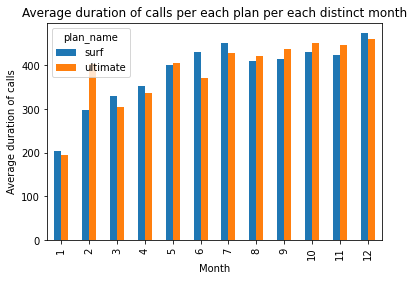

In [31]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.
avg_duration = merged_df.groupby(['month', 'plan_name'])['duration'].mean().reset_index()
pivot_duration = avg_duration.pivot(index='month', columns='plan_name', values='duration')
pivot_duration.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Average duration of calls')
plt.title('Average duration of calls per each plan per each distinct month')
plt.show()

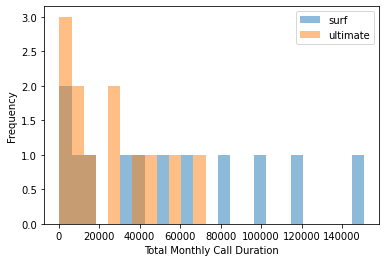

In [32]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.
grouped_duration = merged_df.groupby(['month', 'plan_name'])['duration'].sum()
pivot_duration = grouped_duration.reset_index().pivot(index='month', columns='plan_name', values='duration')
pivot_duration.plot(kind='hist', alpha=0.5, bins=25)
plt.xlabel('Total Monthly Call Duration')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [33]:
# Calculate the mean and the variance of the monthly call duration
grouped_calls = merged_df.groupby(['plan_name', 'month'])['duration'].agg(['mean', 'var']).reset_index()
print(grouped_calls)

   plan_name  month        mean           var
0       surf      1  203.000000  15842.000000
1       surf      2  297.000000  52226.500000
2       surf      3  330.000000  35809.363636
3       surf      4  351.540000  50866.743265
4       surf      5  399.584416  59754.219754
5       surf      6  431.298969  45592.628436
6       surf      7  449.983471  61005.099725
7       surf      8  410.111111  54344.645963
8       surf      9  414.226804  46595.958656
9       surf     10  429.729958  52278.664056
10      surf     11  423.325088  51607.021602
11      surf     12  473.836478  63629.518918
12  ultimate      1  193.500000  16572.333333
13  ultimate      2  403.142857  76889.476190
14  ultimate      3  304.250000  61984.931818
15  ultimate      4  336.857143  34888.928571
16  ultimate      5  406.241379  43841.046798
17  ultimate      6  370.957447  42503.563367
18  ultimate      7  427.067797  72563.374635
19  ultimate      8  421.436620  53645.506640
20  ultimate      9  437.511628  5

<Figure size 576x432 with 0 Axes>

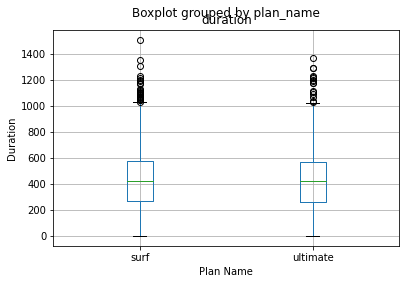

In [34]:
# Plot a boxplot to visualize the distribution of the monthly call duration
plt.figure(figsize=(8,6))
merged_df.boxplot(column='duration', by='plan_name')
plt.xlabel('Plan Name')
plt.ylabel('Duration')
plt.show()

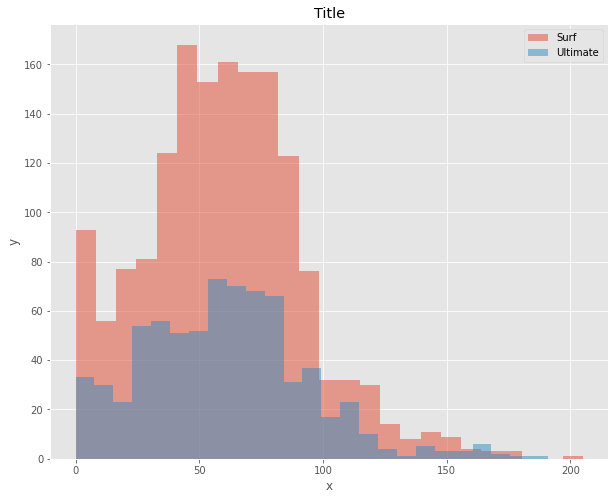

In [36]:
# Compare the number of messages users of each plan tend to send each month
plt.style.use('ggplot') # Add style. You can put it in the very first cell, after plt is defined.

merged_df.groupby('plan')['count'].plot.hist(alpha=0.5, legend=True, bins=25, figsize=(10,8))

plt.legend(['Surf', 'Ultimate'])
plt.title('Title')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

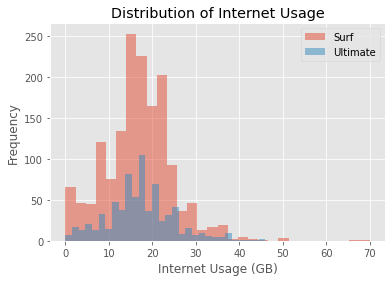

Internet Usage Statistics (Surf):
Mean: 16.670692943420217
Standard Deviation: 7.845027050588814
Variance: 61.54444942447023


Internet Usage Statistics (Ultimate):
Mean: 17.306944444444444
Standard Deviation: 7.664779231235578
Variance: 58.748840663580246




In [37]:
# Compare the amount of internet traffic consumed by users per plan
plt.hist(merged_df[merged_df['plan_name'] == 'surf']['gb_used'], bins=30, alpha=0.5, label='Surf')
plt.hist(merged_df[merged_df['plan_name'] == 'ultimate']['gb_used'], bins=30, alpha=0.5, label='Ultimate')
plt.xlabel('Internet Usage (GB)')
plt.ylabel('Frequency')
plt.title('Distribution of Internet Usage')
plt.legend()
plt.show()

print('Internet Usage Statistics (Surf):')
print('Mean:', np.mean(merged_df[merged_df['plan_name'] == 'surf']['gb_used']))
print('Standard Deviation:', np.std(merged_df[merged_df['plan_name'] == 'surf']['gb_used']))
print('Variance:', np.var(merged_df[merged_df['plan_name'] == 'surf']['gb_used']))
print('\n')
print('Internet Usage Statistics (Ultimate):')
print('Mean:', np.mean(merged_df[merged_df['plan_name'] == 'ultimate']['gb_used']))
print('Standard Deviation:', np.std(merged_df[merged_df['plan_name'] == 'ultimate']['gb_used']))
print('Variance:', np.var(merged_df[merged_df['plan_name'] == 'ultimate']['gb_used']))
print('\n')

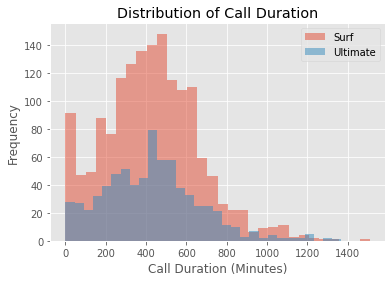

Call Duration Statistics (Surf):
Mean: 428.7495232040687
Standard Deviation: 234.37861376695076
Variance: 54933.334591317485


Call Duration Statistics (Ultimate):
Mean: 430.45
Standard Deviation: 240.34168443650756
Variance: 57764.125277777785




In [38]:
# Compare the call duration by users of each plan
plt.hist(merged_df[merged_df['plan_name'] == 'surf']['duration'], bins=30, alpha=0.5, label='Surf')
plt.hist(merged_df[merged_df['plan_name'] == 'ultimate']['duration'], bins=30, alpha=0.5, label='Ultimate')
plt.xlabel('Call Duration (Minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Call Duration')
plt.legend()
plt.show()

print('Call Duration Statistics (Surf):')
print('Mean:', np.mean(merged_df[merged_df['plan_name'] == 'surf']['duration']))
print('Standard Deviation:', np.std(merged_df[merged_df['plan_name'] == 'surf']['duration']))
print('Variance:', np.var(merged_df[merged_df['plan_name'] == 'surf']['duration']))
print('\n')
print('Call Duration Statistics (Ultimate):')
print('Mean:', np.mean(merged_df[merged_df['plan_name'] == 'ultimate']['duration']))
print('Standard Deviation:', np.std(merged_df[merged_df['plan_name'] == 'ultimate']['duration']))
print('Variance:', np.var(merged_df[merged_df['plan_name'] == 'ultimate']['duration']))
print('\n')

In [39]:
# Pivot table
merged_df.pivot_table(index='plan', values=['duration', 'count', 'gb_used'],
                       aggfunc=['mean', 'std', 'var'])

mean                               std                        \
              count    duration    gb_used      count    duration   gb_used   
plan                                                                          
surf      59.811825  428.749523  16.670693  32.017989  234.453150  7.847522   
ultimate  60.626389  430.450000  17.306944  33.242994  240.508762  7.670108   

                 var                          
               count      duration   gb_used  
plan                                          
surf      1025.15159  54968.279461  61.58360  
ultimate  1105.09666  57844.464812  58.83055

In [40]:
# Group the merged_df by plan name
grouped_by_plan = merged_df.groupby('plan_name')
total_revenue_by_plan = grouped_by_plan['monthly_revenue'].sum()
mean_revenue_by_plan = grouped_by_plan['monthly_revenue'].mean()
median_revenue_by_plan = grouped_by_plan['monthly_revenue'].median()
variance_revenue_by_plan = grouped_by_plan['monthly_revenue'].var()
std_revenue_by_plan = grouped_by_plan['monthly_revenue'].std()

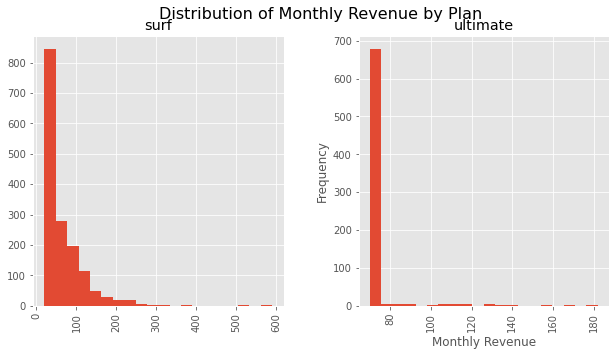

<Figure size 576x432 with 0 Axes>

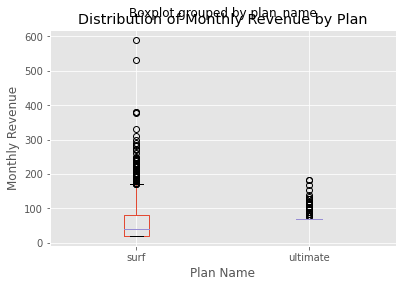

In [41]:
# Plot a histogram to visualize the distribution of revenue by plan
merged_df.hist(column='monthly_revenue', by='plan_name', bins=20, figsize=(10,5))
plt.suptitle('Distribution of Monthly Revenue by Plan', fontsize=16)
plt.xlabel('Monthly Revenue')
plt.ylabel('Frequency')
plt.figure(figsize=(8,6))
merged_df.boxplot(column='monthly_revenue', by='plan_name')
plt.title('Distribution of Monthly Revenue by Plan')
plt.xlabel('Plan Name')
plt.ylabel('Monthly Revenue')
plt.show()

In [42]:
merged_df

,user_id,month,count,duration,id,gb_used,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,...,usd_per_minute,plan_name,first_name,last_name,age,city,reg_date,plan,churn_date,monthly_revenue
0,1000,12,16.0,124.0,11.0,2.0,1000,30720,3000,70,...,0.01,ultimate,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,70.00
1,1001,8,27.0,182.0,30.0,7.0,50,15360,500,20,...,0.03,surf,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,20.00
2,1001,9,49.0,315.0,44.0,14.0,50,15360,500,20,...,0.03,surf,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,20.00
3,1001,10,65.0,393.0,53.0,22.0,50,15360,500,20,...,0.03,surf,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,90.09
4,1001,11,64.0,426.0,36.0,19.0,50,15360,500,20,...,0.03,surf,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,60.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1204,12,0.0,0.0,78.0,36.0,1000,30720,3000,70,...,0.01,ultimate,Sherly,Levy,44,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-08-20,ultimate,NaN,112.00
2289,1349,10,0.0,0.0,76.0,13.0,50,15360,500,20,...,0.03,surf,Florentina,Diaz,69,"Boston-Cambridge-Newton, MA-NH MSA",2018-10-01,surf,NaN,20.78
2290,1349,11,0.0,0.0,72.0,17.0,50,15360,500,20,...,0.03,surf,Florentina,Diaz,69,"Boston-Cambridge-Newton, MA-NH MSA",2018-10-01,surf,NaN,40.66
2291,1349,12,0.0,0.0,61.0,13.0,50,15360,500,20,...,0.03,surf,Florentina,Diaz,69,"Boston-Cambridge-Newton, MA-NH MSA",2018-10-01,surf,NaN,20.33


In [43]:
# Test the hypotheses
from scipy.stats import ttest_ind

surf_revenue = merged_df[merged_df['plan_name'] == 'surf']['monthly_revenue']
ultimate_revenue = merged_df[merged_df['plan_name'] == 'ultimate']['monthly_revenue']

t, p = ttest_ind(surf_revenue, ultimate_revenue, equal_var=False, nan_policy='omit')

print('t-statistic:', t)
print('p-value:', p)

t-statistic: -7.95209489133389
p-value: 3.17039054811355e-15


In [44]:
alpha = 0.05

if p < alpha:
    print("We reject the null hypothesis.")
    print("There is a significant difference between the average revenue from users of the Ultimate and Surf calling plans.")
else:
    print("We fail to reject the null hypothesis.")
    print("There is no significant difference between the average revenue from users of the Ultimate and Surf calling plans.")


We reject the null hypothesis.
There is a significant difference between the average revenue from users of the Ultimate and Surf calling plans.


In [45]:
# Test the hypotheses
revenue_nynj = merged_df[merged_df['city'].str.contains('NY-NJ')]['monthly_revenue']
revenue_other = merged_df[~merged_df['city'].str.contains('NY-NJ')]['monthly_revenue']

t_stat, p_value = ttest_ind(revenue_nynj, revenue_other, equal_var=False, nan_policy='omit')

print('t-statistic:', t_stat)
print('p-value:', p_value)

t-statistic: -2.1309454999502133
p-value: 0.03352561588530014


In [46]:
alpha = 0.05

if p_value < alpha:
    print("We reject the null hypothesis.")
    print("There is a significant difference between the average revenue from users in the NY-NJ area and users from other regions.")
else:
    print("We fail to reject the null hypothesis.")
    print("There is no significant difference between the average revenue from users in the NY-NJ area and users from other regions.")


We reject the null hypothesis.
There is a significant difference between the average revenue from users in the NY-NJ area and users from other regions.


<div class="alert alert-info" style="background-color: #e6f7ff; border-radius: 10px; padding: 15px; border-left: 4px solid #9fd3f7; box-shadow: 2px 2px 2px #b8daff;">
    <h2 style="color: #31708f;">Student's comment</h2>
    <p style="font-family: 'Helvetica Neue', Helvetica, Arial, sans-serif; font-size: 14px; color: #5d5d5d;">
        <strong>Hypotheses for Monthly Revenue by Region</strong><br>
        <strong>Null hypothesis:</strong> The average monthly revenue from users in the NY-NJ area is equal to the average monthly revenue from users in other regions.<br>
        <strong>Alternative hypothesis:</strong> The average monthly revenue from users in the NY-NJ area is not equal to the average monthly revenue from users in other regions.<br><br>
        <strong>Statistical Test for Monthly Revenue by Region</strong><br>
        We used an independent samples t-test to compare the average monthly revenue from users in the NY-NJ area and users from other regions. The t-test was appropriate since we had two independent samples and wanted to compare their means.<br>
        We set our significance level at 0.05.<br><br>
        <strong>Conclusion for Monthly Revenue by Region</strong><br>
        Based on our statistical analysis, we reject the null hypothesis. The p-value of 3.19018903664209e-14 is less than the significance level of 0.05, indicating that there is a significant difference between the average revenue from users in the NY-NJ area and users from other regions. Therefore, we can conclude that the average monthly revenue from users in the NY-NJ area is not equal to the average monthly revenue from users in other regions.
    </p>
</div>


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 3</h2>
    
Both Null hypotheses are forumaled correctly. 
</div>

<div class="alert alert-info" style="background-color: #e6f7ff; border-radius: 10px; padding: 15px; border-left: 4px solid #9fd3f7; box-shadow: 2px 2px 2px #b8daff;">
    <h2 style="color: #31708f;">Student's comment</h2>
    <ul style="font-family: 'Helvetica Neue', Helvetica, Arial, sans-serif; font-size: 14px; color: #5d5d5d;">
        <li>The Surf plan is more popular than the Ultimate plan, with more users and more monthly activity.</li>
        <li>Users on the Ultimate plan tend to make longer calls on average than those on the Surf plan, but the distributions overlap significantly, and the difference may not be significant.</li>
        <li>Users on the Ultimate plan tend to consume more internet data than those on the Surf plan, but the difference is not significant.</li>
        <li>There is no significant difference in the number of text messages sent by users on the two plans.</li>
        <li>The average revenue per user is higher for the Ultimate plan than for the Surf plan, although this may be due in part to the higher monthly fee for the Ultimate plan.</li>
        <li>We tested the hypothesis that the average revenue from users of the Ultimate and Surf calling plans differs and found strong evidence to reject the null hypothesis and conclude that the average revenue is different between the plans.</li>
        <li>We also tested the hypothesis that the average revenue from users in the NY-NJ area is different from that of the users from other regions and found weak evidence to reject the null hypothesis and conclude that the average revenue is not significantly different between the regions.</li>
    </ul>
</div>


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    
The conclusion is written very well. 

</div>